<a href="https://colab.research.google.com/github/MariamAmmar/6644_Final_Project/blob/main/MasterData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

# Import the numpy and pandas package

from google.colab import drive
from google.colab import files

drive.mount('/content/drive')
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#Import tables and merge to create master table


data1 = pd.read_csv('/content/drive/MyDrive/6644/price_fact.csv')
data2 = pd.read_csv('/content/drive/MyDrive/6644/site_dim.csv')

uploaded = files.upload()



# url1 = '/MyDrive/6644/price_fact.csv'
price = pd.read_csv('price_fact.csv')
new_df = pd.read_csv('new_df.csv')

# url2 = '6644/site_dim.csv'
# site = pd.read_csv(url2)

# site.rename(columns={'site_number': 'site_id'}, inplace=True)

# merged_data = pd.merge(price, site, on='site_id')



In [159]:
##Create master DF to be used by everyone
#Start by8 merging dataframes and dropping unneeded columns

price = pd.read_csv('price_fact.csv')
site = pd.read_csv('site_dim.csv')
new_df = pd.read_csv('new_df.csv')

price['fiscal_week_end_date'] = pd.to_datetime(price['fiscal_week_end_date'])
new_df['fiscal_week_end_date'] = pd.to_datetime(new_df['fiscal_week_end_date'])

new_df.rename(columns={'site_number_corporate': 'site_id'}, inplace=True)

site.rename(columns={'site_number': 'site_id'}, inplace=True)

merged_data = pd.merge(price, site, on='site_id',how = "left")

merged_data['fiscal_week_end_date'] = pd.to_datetime(merged_data['fiscal_week_end_date'])

# Define the number of samples to take from each group
num_samples = 5000  # Change this value as needed

# Randomly sample from each group
merged_data = merged_data.groupby('fiscal_week_end_date', group_keys=False).apply(lambda x: x.sample(min(len(x), num_samples)))
new_df = pd.merge(new_df, site, on='site_id',how = "left")

print(new_df.columns)
new_df = pd.merge(new_df, price, on=['site_id',"fiscal_week_end_date"],how = "left")

print(new_df.columns)


Index(['division_desc_x', 'product_key', 'Region', 'site_id', 'business_date',
       '1_product_key_org', 'sales_amount', 'quantity_sold', 'site_address',
       'site_city', 'site_zip', 'site_state_id', 'gps_latitude',
       'gps_longitude', 'region_desc_x', 'margin_rate', 'unit_cost',
       'unit_cost_actual', 'final_cost', 'margin', '2_product_key_cons',
       'environment_name', 'item_number', 'upc', 'sell_unit_qty',
       'package_desc', 'size_unit_of_measure', 'private_brand_desc',
       'department_desc', 'category_desc', 'sub_category_desc', 'brand_desc',
       'manufacturer_desc', 'item_desc', 'item_key', 'fiscal_week_key',
       'fiscal_period_key', 'fiscal_week', 'fiscal_week_number',
       'fiscal_week_name', 'fiscal_week_name_fr', 'fiscal_week_start_date',
       'fiscal_week_end_date', 'fiscal_week_number_in_per',
       'fiscal_week_count_in_per', 'labor_pay_week_start_date',
       'labor_pay_week_end_date', 'fiscal_week_rank',
       'current_fiscal_week_offse

In [158]:
##Create master DF to be used by everyone
#Start by dropping unneeded columns

drop_cols = ["Eastern_Canada_Breakdown","site_country_id","division_desc","region_desc","Market_ID","site_number.1","Fresh_Food_Fast_Program_Indicator"]

merged_data.drop(columns=drop_cols, inplace=True)


print(new_df.columns)


Index(['division_desc_x', 'product_key', 'Region', 'site_id', 'business_date',
       '1_product_key_org', 'sales_amount', 'quantity_sold', 'site_address',
       'site_city', 'site_zip', 'site_state_id', 'gps_latitude',
       'gps_longitude', 'region_desc_x', 'margin_rate', 'unit_cost',
       'unit_cost_actual', 'final_cost', 'margin', '2_product_key_cons',
       'environment_name', 'item_number', 'upc', 'sell_unit_qty',
       'package_desc', 'size_unit_of_measure', 'private_brand_desc',
       'department_desc', 'category_desc', 'sub_category_desc', 'brand_desc',
       'manufacturer_desc', 'item_desc', 'item_key', 'fiscal_week_key',
       'fiscal_period_key', 'fiscal_week', 'fiscal_week_number',
       'fiscal_week_name', 'fiscal_week_name_fr', 'fiscal_week_start_date',
       'fiscal_week_end_date', 'fiscal_week_number_in_per',
       'fiscal_week_count_in_per', 'labor_pay_week_start_date',
       'labor_pay_week_end_date', 'fiscal_week_rank',
       'current_fiscal_week_offse

In [166]:
##Engineer margin features for margin dollers and margin rate
merged_data.dropna(inplace=True)

#merged_data["margin_per_unit"] = merged_data["unit_price"] - merged_data["final_cost"]
merged_data["total_margin"] = (merged_data["unit_price"] - merged_data["net_single_unit_cost"]) * (merged_data["units_sold"])
merged_data["margin_rate"] = (((merged_data["margin_per_unit"]) *(merged_data["units_sold"])) / merged_data["item_sales"]).round(2)
merged_data["units_sold_PSPW"] = ((merged_data["units_sold"]) /merged_data["site_id"].nunique()/ merged_data["fiscal_week_end_date"].nunique())


mw_df = merged_data[merged_data["BU_simplified_name"] == "MIDWEST"]

KeyError: 'margin_per_unit'

In [129]:
merged_data['fiscal_week_end_date'].unique()

array(['2023-02-05T00:00:00.000000000', '2023-02-12T00:00:00.000000000',
       '2023-02-19T00:00:00.000000000', '2023-02-26T00:00:00.000000000',
       '2023-03-05T00:00:00.000000000', '2023-03-12T00:00:00.000000000',
       '2023-03-19T00:00:00.000000000', '2023-03-26T00:00:00.000000000',
       '2023-04-02T00:00:00.000000000', '2023-04-09T00:00:00.000000000',
       '2023-04-16T00:00:00.000000000', '2023-04-23T00:00:00.000000000',
       '2023-04-30T00:00:00.000000000', '2023-05-07T00:00:00.000000000',
       '2023-05-14T00:00:00.000000000', '2023-05-21T00:00:00.000000000',
       '2023-05-28T00:00:00.000000000', '2023-06-04T00:00:00.000000000',
       '2023-06-11T00:00:00.000000000', '2023-06-18T00:00:00.000000000',
       '2023-06-25T00:00:00.000000000', '2023-07-02T00:00:00.000000000',
       '2023-07-09T00:00:00.000000000', '2023-07-16T00:00:00.000000000',
       '2023-07-23T00:00:00.000000000', '2023-07-30T00:00:00.000000000',
       '2023-08-06T00:00:00.000000000', '2023-08-13

In [130]:
merged_data[["net_single_unit_cost","unit_price","margin_per_unit","margin_rate","total_margin","units_sold_per_week"]].head()

,net_single_unit_cost,unit_price,margin_per_unit,margin_rate,total_margin,units_sold_per_week
284545,1.08,2.35,1.27,0.54,44.45,0.636364
292946,1.10,2.36,1.26,0.54,41.58,0.600000
128215,1.24,1.97,0.73,0.39,81.76,2.036364
306907,1.08,2.46,1.38,0.56,19.32,0.254545
151269,1.46,2.22,0.76,0.34,28.88,0.690909


In [131]:
print(merged_data.columns)

Index(['site_id', 'fiscal_week_end_date', 'item_sales', 'units_sold',
       'avg_basket', 'units_per_basket', 'unit_price', 'gross_package_cost',
       'net_single_unit_cost', 'net_package_cost', 'num_transactions',
       'store_size', 'market_share', 'car_traffic', 'seconds_to_near_highway',
       'dist_nearest_act_site', 'Final_urbanicity', 'Pop_Estimate_CrYr',
       'dist_nearest_grocery', 'Total_merch_revenue_2022',
       'Median_HH_Income_CrYr', 'closest_tier1_competitor', 'Region_ID',
       'site_state_desc', 'BU_simplified_name', 'margin_per_unit',
       'total_margin', 'margin_rate', 'units_sold_per_week'],
      dtype='object')


<ipython-input-161-e5f30ef7c1a8>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


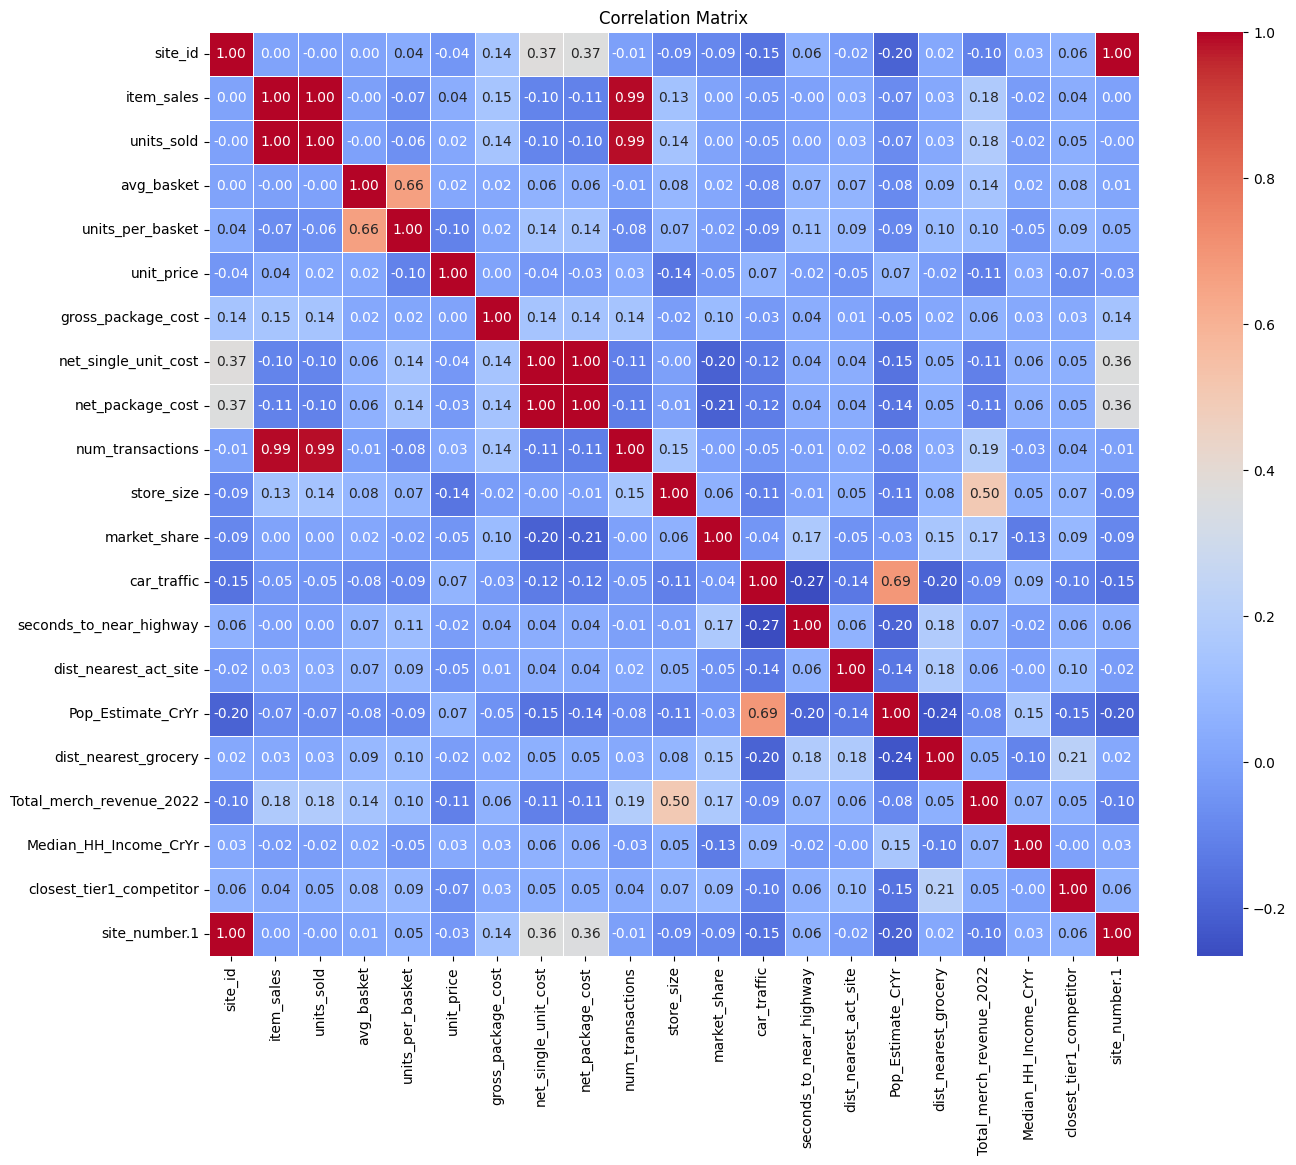

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 12))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

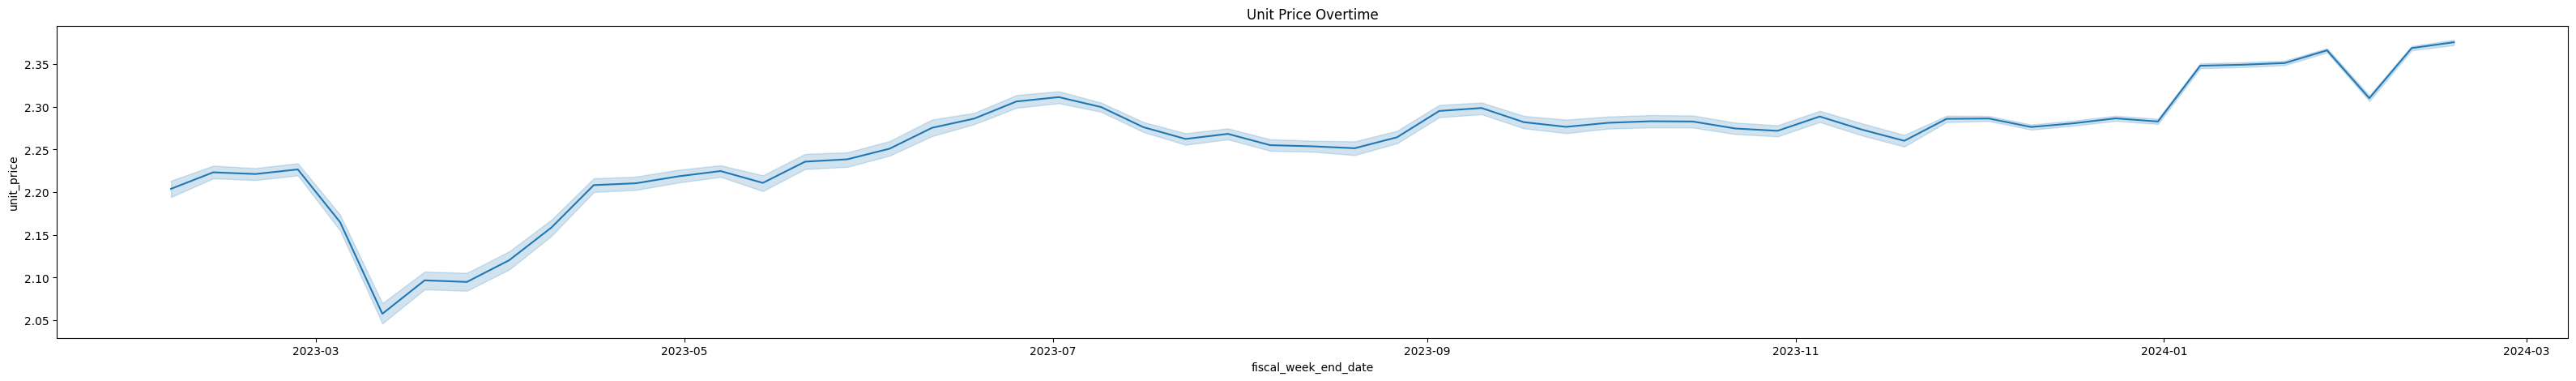

In [100]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='unit_price')
plt.title('Unit Price Overtime')
plt.show()

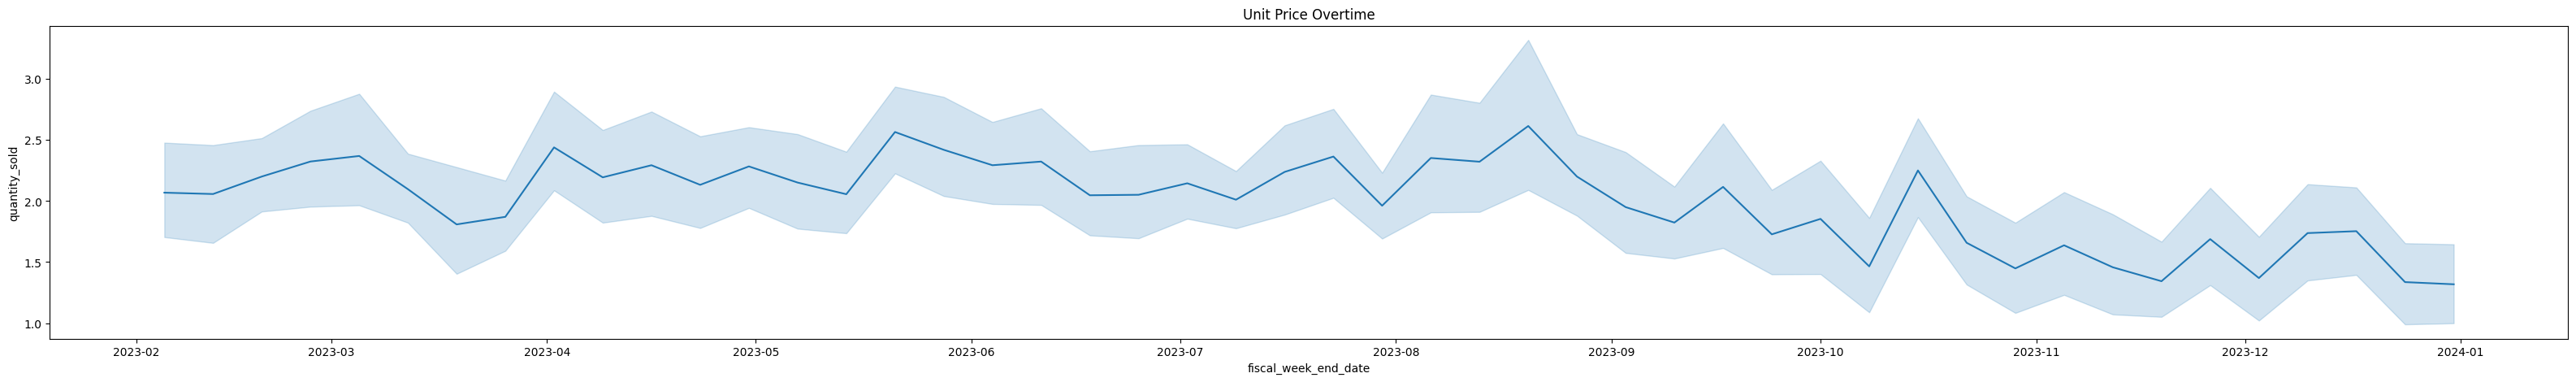

In [157]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=new_df, x='fiscal_week_end_date', y='quantity_sold')
plt.title('Unit Price Overtime')
plt.show()

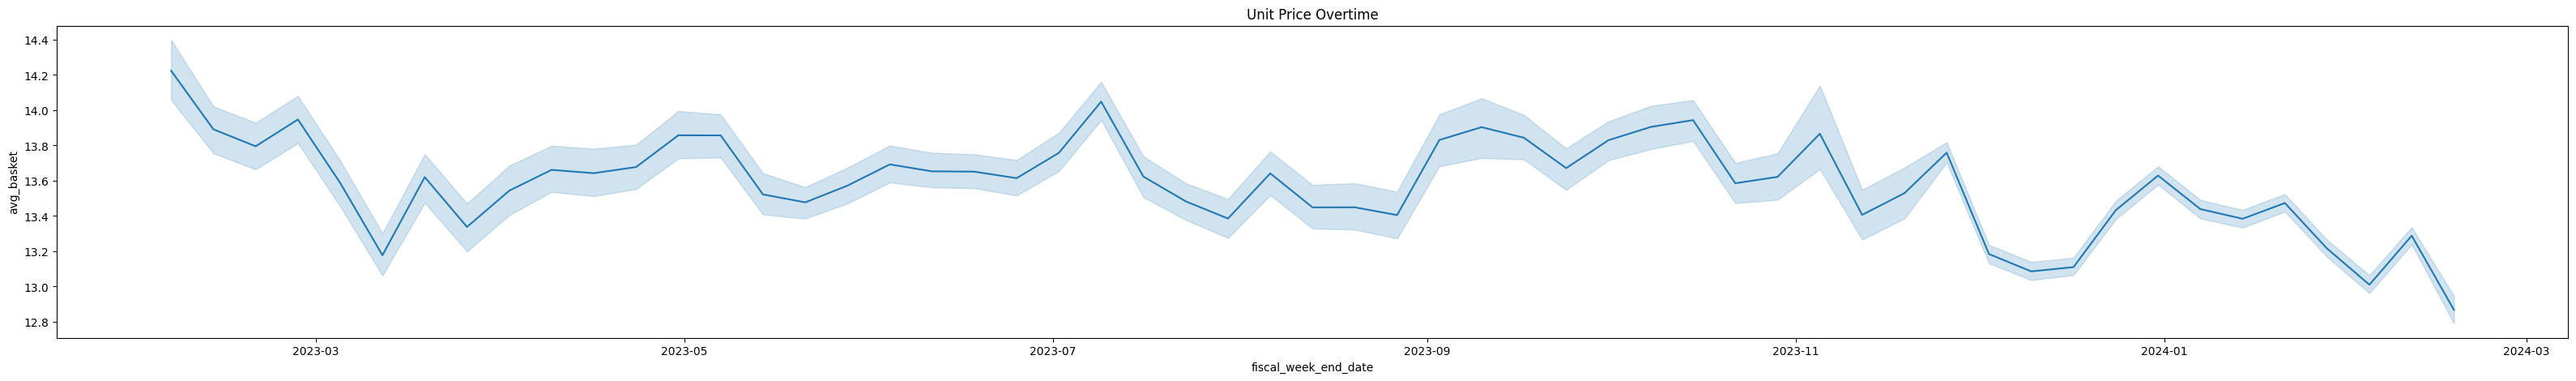

In [154]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='avg_basket')
plt.title('Unit Price Overtime')
plt.show()

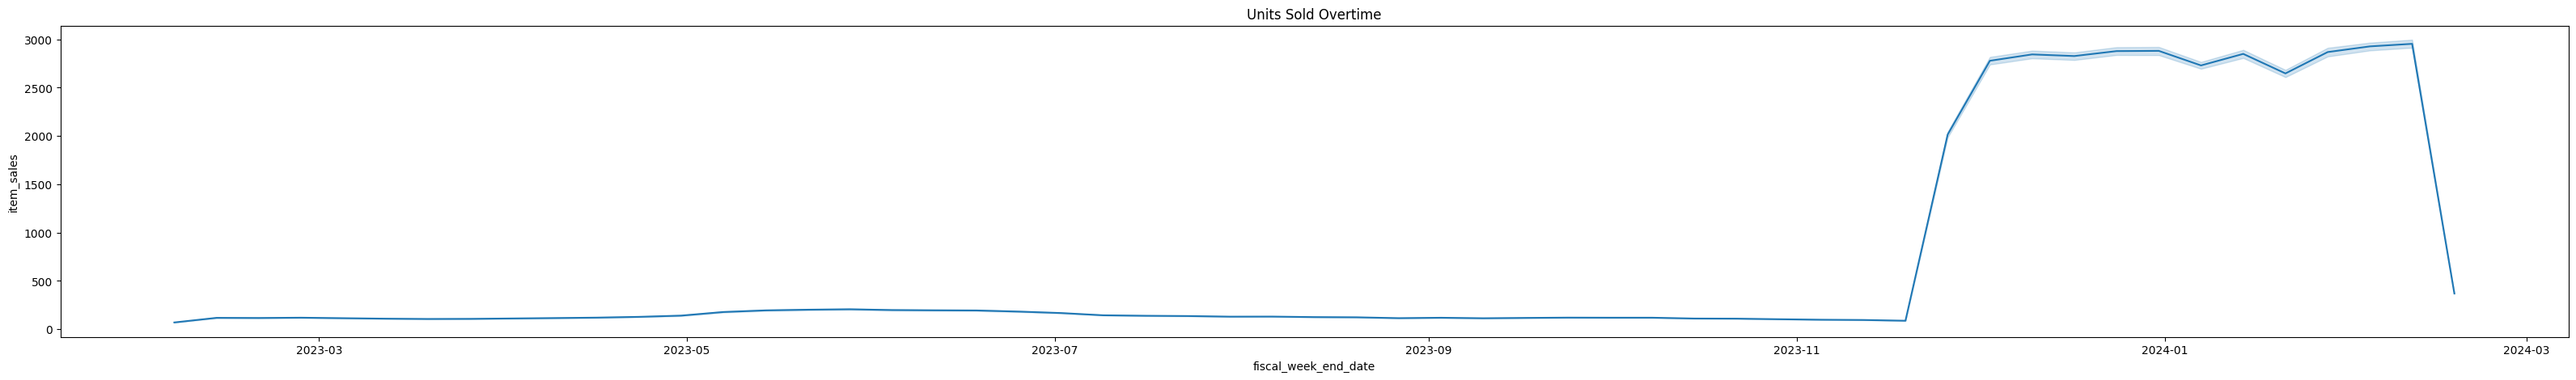

In [135]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=merged_data, x='fiscal_week_end_date', y='item_sales')
plt.title('Units Sold Overtime')
plt.show()



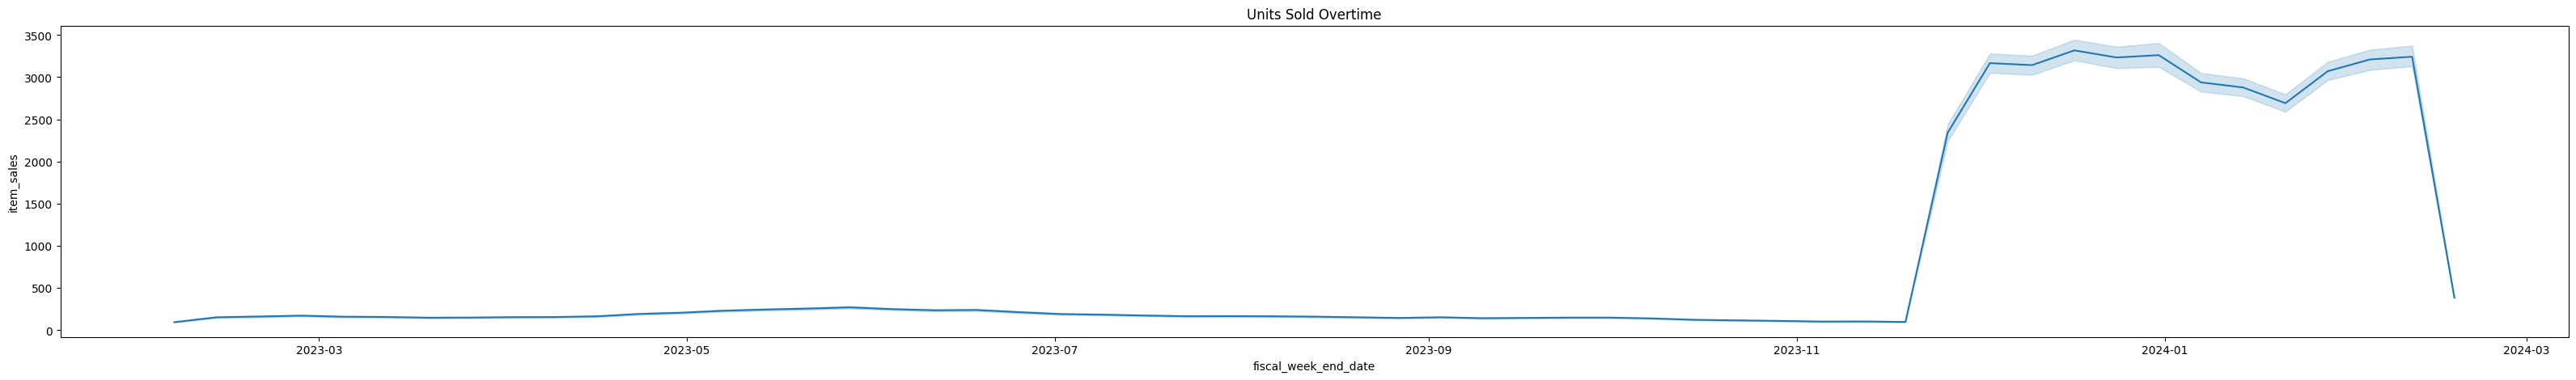

In [141]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=mw_df, x='fiscal_week_end_date', y='item_sales')
plt.title('Units Sold Overtime')
plt.show()


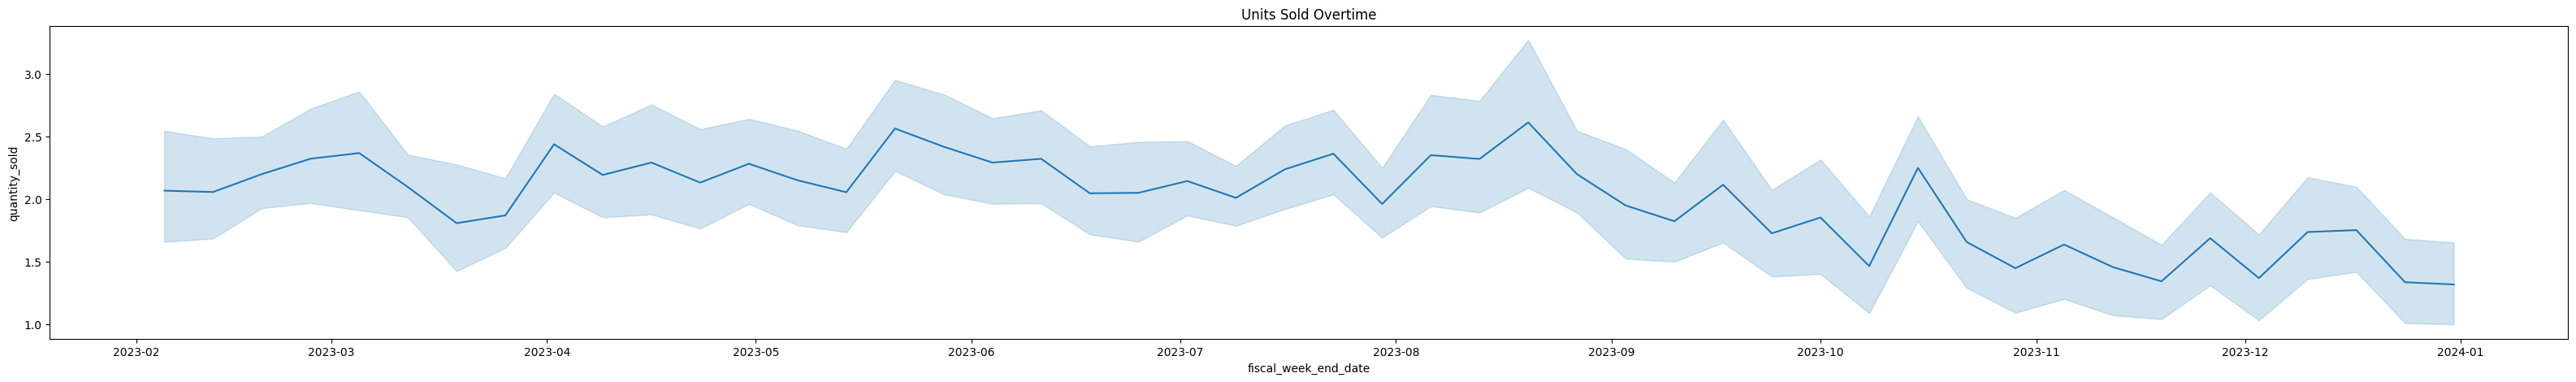

In [146]:
plt.figure(figsize=(40, 5))
sns.lineplot(data=new_df, x='fiscal_week_end_date', y='quantity_sold')
plt.title('Units Sold Overtime')
plt.show()


In [94]:
merged_data.shape[0]

160441

In [102]:
result = merged_data.groupby('fiscal_week_end_date').agg({'units_sold': 'sum', 'item_sales': 'sum'})

print(result)


                      units_sold   item_sales
fiscal_week_end_date                         
2023-02-05                 65970    137210.34
2023-02-12                116627    244978.66
2023-02-19                116114    244231.17
2023-02-26                117957    250237.58
2023-03-05                118456    245407.34
2023-03-12                118196    235193.15
2023-03-19                114299    230986.12
2023-03-26                112372    227978.01
2023-04-02                112416    230504.36
2023-04-09                115417    239017.99
2023-04-16                116457    245285.43
2023-04-23                127749    268084.60
2023-04-30                140047    293829.74
2023-05-07                179911    377714.90
2023-05-14                193222    404253.83
2023-05-21                193134    411914.75
2023-05-28                196701    420064.64
2023-06-04                187674    404356.06
2023-06-11                187752    406781.82
2023-06-18                182841  

In [115]:
result = price.groupby('fiscal_week_end_date').agg({'units_sold': 'sum', 'item_sales': 'sum'})

print(result)


                      units_sold   item_sales
fiscal_week_end_date                         
2023-02-05                137956    298844.12
2023-02-12                235380    511634.84
2023-02-19                238284    517833.43
2023-02-26                247171    540816.81
2023-03-05                243557    522587.28
2023-03-12                242094    499606.64
2023-03-19                233053    486935.63
2023-03-26                233229    488401.92
2023-04-02                236580    498671.28
2023-04-09                236442    504887.41
2023-04-16                233091    506542.48
2023-04-23                272616    596018.31
2023-04-30                301102    658803.70
2023-05-07                371054    805471.46
2023-05-14                401664    863408.26
2023-05-21                434083    946151.62
2023-05-28                438668    956668.80
2023-06-04                424396    930696.47
2023-06-11                423254    932809.38
2023-06-18                416773  

In [ ]:
result = price.groupby('').agg({'units_sold': 'sum', 'item_sales': 'sum'})

print(result)

<Axes: xlabel='fiscal_week_end_date', ylabel='quantity_sold'>

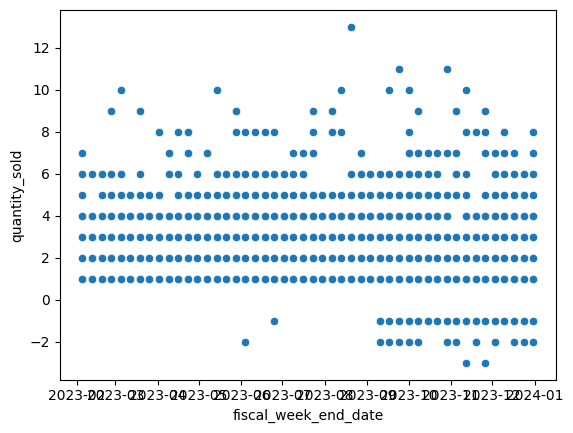

In [144]:
sns.scatterplot(data=new_df, x='fiscal_week_end_date', y='quantity_sold')


In [143]:
new_df.columns

Index(['division_desc', 'product_key', 'Region', 'site_number_corporate',
       'business_date', '1_product_key_org', 'sales_amount', 'quantity_sold',
       'site_address', 'site_city', 'site_zip', 'site_state_id',
       'gps_latitude', 'gps_longitude', 'region_desc', 'margin_rate',
       'unit_cost', 'unit_cost_actual', 'final_cost', 'margin',
       '2_product_key_cons', 'environment_name', 'item_number', 'upc',
       'sell_unit_qty', 'package_desc', 'size_unit_of_measure',
       'private_brand_desc', 'department_desc', 'category_desc',
       'sub_category_desc', 'brand_desc', 'manufacturer_desc', 'item_desc',
       'item_key', 'fiscal_week_key', 'fiscal_period_key', 'fiscal_week',
       'fiscal_week_number', 'fiscal_week_name', 'fiscal_week_name_fr',
       'fiscal_week_start_date', 'fiscal_week_end_date',
       'fiscal_week_number_in_per', 'fiscal_week_count_in_per',
       'labor_pay_week_start_date', 'labor_pay_week_end_date',
       'fiscal_week_rank', 'current_fiscal_

In [137]:


merged_data["fiscal_week_end_date"].nunique()

55

In [123]:
merged_data["fiscal_week_end_date"].value_counts()

2023-02-05    5000
2023-11-19    5000
2023-09-03    5000
2023-09-10    5000
2023-09-17    5000
2023-09-24    5000
2023-10-01    5000
2023-10-08    5000
2023-10-15    5000
2023-10-22    5000
2023-10-29    5000
2023-11-05    5000
2023-11-12    5000
2023-11-26    5000
2023-08-20    5000
2023-12-03    5000
2023-12-10    5000
2023-12-17    5000
2023-12-24    5000
2023-12-31    5000
2024-01-07    5000
2024-01-14    5000
2024-01-21    5000
2024-01-28    5000
2024-02-04    5000
2024-02-11    5000
2023-08-27    5000
2023-08-13    5000
2023-02-12    5000
2023-05-07    5000
2023-02-19    5000
2023-02-26    5000
2023-03-05    5000
2023-03-12    5000
2023-03-19    5000
2023-03-26    5000
2023-04-02    5000
2023-04-09    5000
2023-04-16    5000
2023-04-23    5000
2023-04-30    5000
2023-05-14    5000
2023-08-06    5000
2023-05-21    5000
2023-05-28    5000
2023-06-04    5000
2023-06-11    5000
2023-06-18    5000
2023-06-25    5000
2023-07-02    5000
2023-07-09    5000
2023-07-16    5000
2023-07-23  